In this tutorial, we used the pulsar classification data from https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate?resource=download and further used decision tree classifier.
Using this data, we are trying to compare different ML algorithms for testing their efficiency.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("/content/pulsar_data_train.csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [7]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                9273 non-null   float64
 1    Standard deviation of the integrated profile  9273 non-null   float64
 2    Excess kurtosis of the integrated profile     9273 non-null   float64
 3    Skewness of the integrated profile            9273 non-null   float64
 4    Mean of the DM-SNR curve                      9273 non-null   float64
 5    Standard deviation of the DM-SNR curve        9273 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           9273 non-null   float64
 7    Skewness of the DM-SNR curve                  9273 non-null   float64
 8   target_class                                   9273 non-null   float64
dtypes: float64(9)
memory usage: 724.5 KB


In [10]:
data["target_class"].unique()

array([0., 1.])

In [11]:
corr = data.corr()


<Axes: >

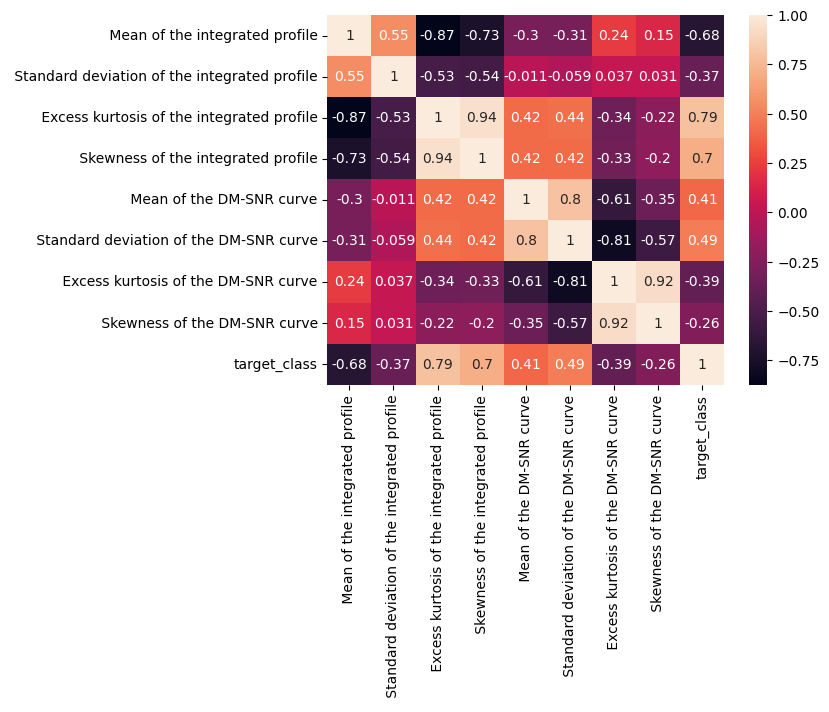

In [12]:
sns.heatmap(corr, annot=True)

In [13]:
Y = data["target_class"]
X = data.drop(["target_class"], axis=1)

In [14]:

X.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578


In [15]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)  # 70% train, 30% test

In [18]:
model = dtc()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = model.predict(X_test)

In [20]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9654924514737598


In [21]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.98      0.98      0.98      2522\n         1.0       0.81      0.82      0.82       260\n\n    accuracy                           0.97      2782\n   macro avg       0.90      0.90      0.90      2782\nweighted avg       0.97      0.97      0.97      2782\n'

In [22]:
cm = confusion_matrix(y_test, y_pred)

<Axes: >

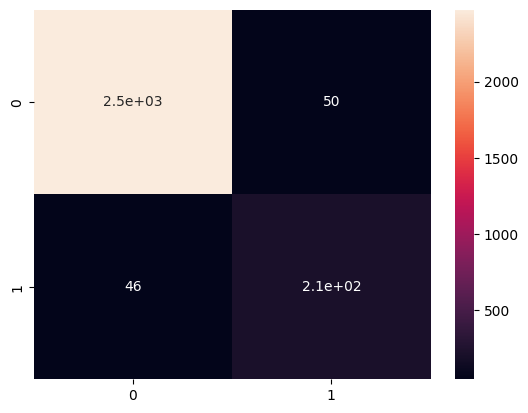

In [23]:

sns.heatmap(cm, annot=True)

In [24]:
rmse = root_mean_squared_error(y_test, y_pred)
print(rmse)

0.18576207504827275


In [50]:
model2 = dtc(criterion='entropy', max_depth=5, min_samples_split=8)
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [51]:
y_pred2 = model2.predict(X_test)

In [52]:
acc2 = accuracy_score(y_test, y_pred2)
print(acc2)

0.9766355140186916


In [53]:
from sklearn.metrics import roc_curve as ro

In [57]:
fpr, tpr, thres = ro(y_test, y_pred2)

Text(0, 0.5, 'True positive rate')

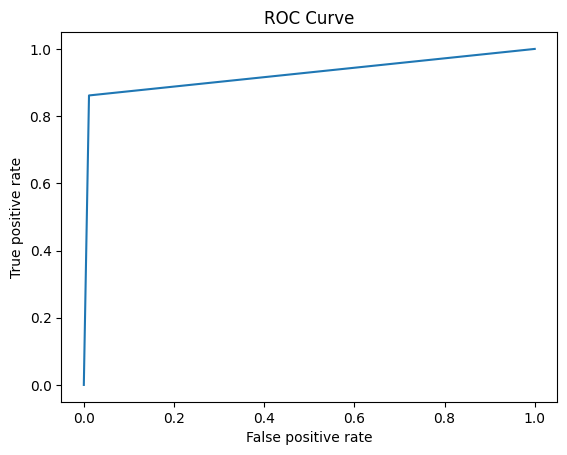

In [62]:
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")